In [1]:
import pandas as pd

df = pd.read_csv('./Dataset/student.csv')

print(df.head())


   Unnamed: 0    Id  Student_Age     Sex High_School_Type Scholarship   
0           0  5001           21    Male            Other         50%  \
1           1  5002           20    Male            Other         50%   
2           2  5003           21    Male            State         50%   
3           3  5004           18  Female          Private         50%   
4           4  5005           22    Male          Private         50%   

  Additional_Work Sports_activity Transportation  Weekly_Study_Hours   
0             Yes              No        Private                 0.0  \
1             Yes              No        Private                 0.0   
2              No              No        Private                 2.0   
3             Yes              No            Bus                 NaN   
4              No              No            Bus                12.0   

  Attendance Reading Notes Listening_in_Class Project_work Grade  
0     Always     Yes   Yes                 No           No   

Data Visualizations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./Dataset/student.csv')


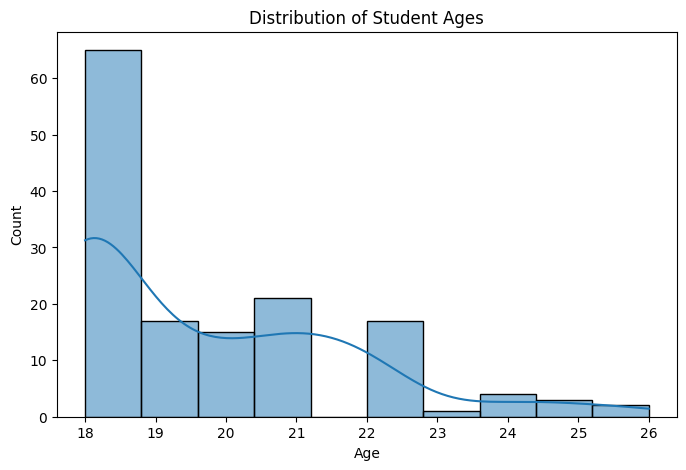

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Student_Age'], bins=10, kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


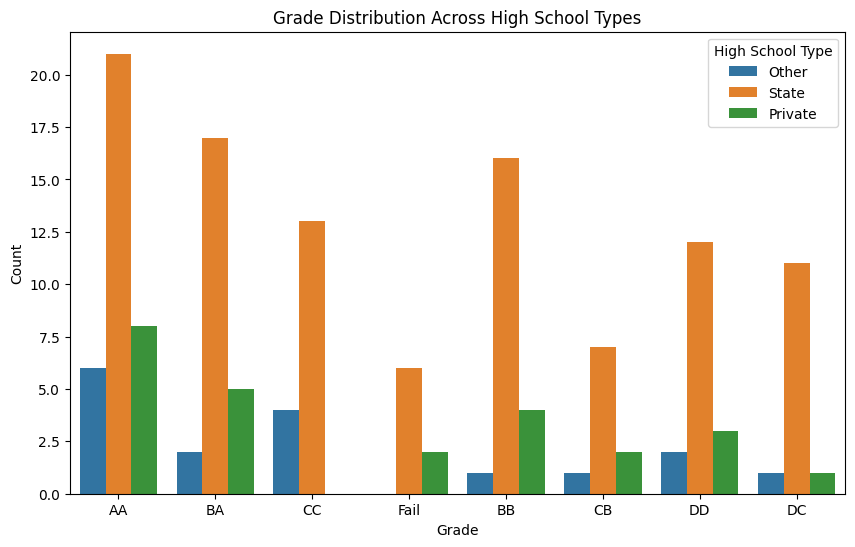

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', hue='High_School_Type', data=df)
plt.title('Grade Distribution Across High School Types')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='High School Type')
plt.show()


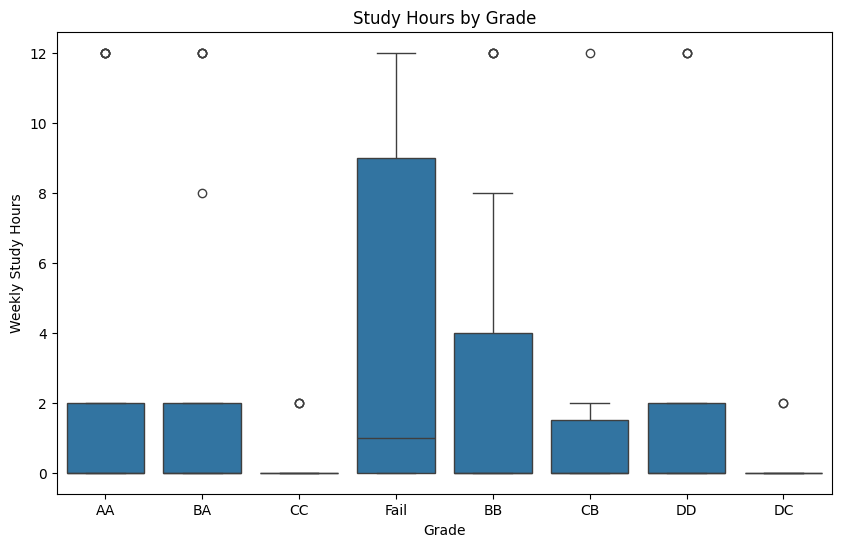

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Weekly_Study_Hours', data=df)
plt.title('Study Hours by Grade')
plt.xlabel('Grade')
plt.ylabel('Weekly Study Hours')
plt.show()


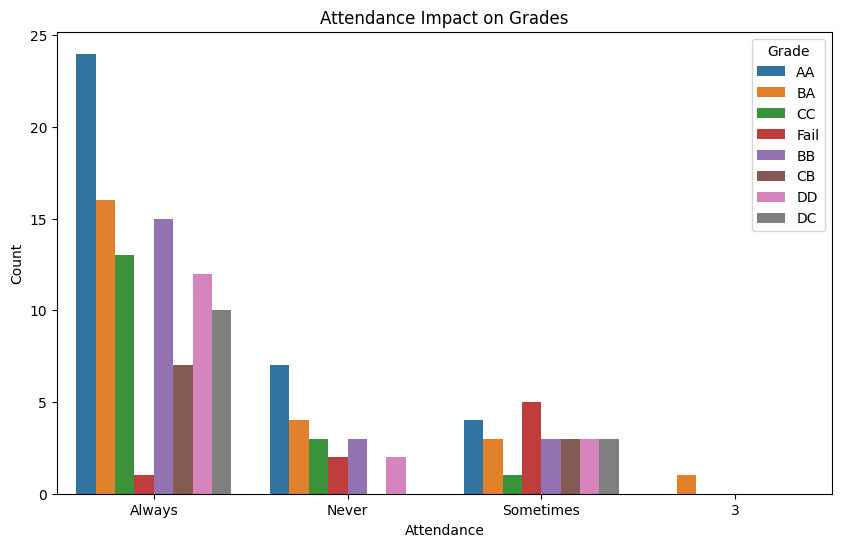

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attendance', hue='Grade', data=df)
plt.title('Attendance Impact on Grades')
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.legend(title='Grade', loc='upper right')
plt.show()


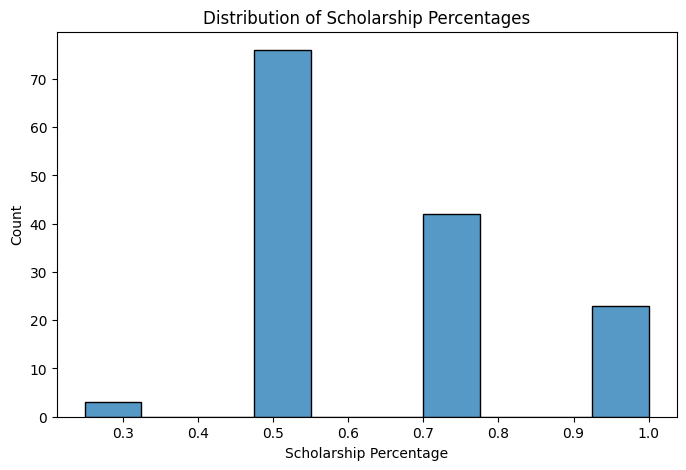

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Scholarship'] = pd.to_numeric(df['Scholarship'].str.rstrip('%'), errors='coerce') / 100

# Now, you can plot the distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Scholarship'], bins=10, kde=False)
plt.title('Distribution of Scholarship Percentages')
plt.xlabel('Scholarship Percentage')
plt.ylabel('Count')
plt.show()



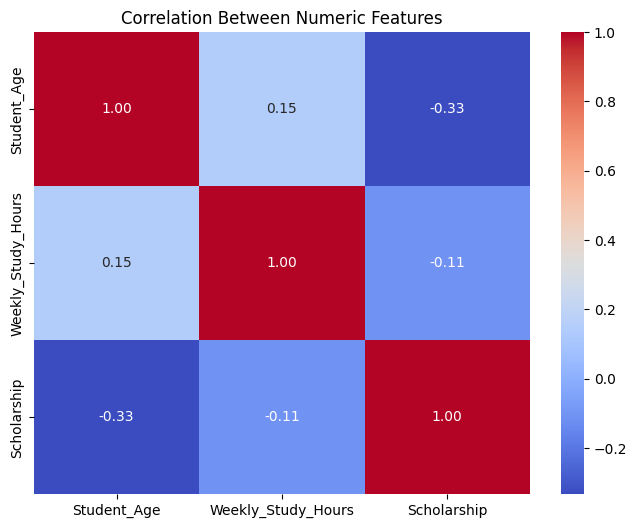

In [9]:

numeric_cols = ['Student_Age', 'Weekly_Study_Hours', 'Scholarship']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


#Data Cleaning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


missing_values_count = df['Weekly_Study_Hours'].isnull().sum()
print(f"Missing values in 'Weekly_Study_Hours': {missing_values_count}")


Missing values in 'Weekly_Study_Hours': 7


Different Imputation Techniques

In [11]:
mean_val = df['Weekly_Study_Hours'].mean()
df['Weekly_Study_Hours_mean'] = df['Weekly_Study_Hours'].fillna(mean_val)


In [12]:
median_val = df['Weekly_Study_Hours'].median()
df['Weekly_Study_Hours_median'] = df['Weekly_Study_Hours'].fillna(median_val)


In [13]:

train_data = df[df['Weekly_Study_Hours'].notnull()]
test_data = df[df['Weekly_Study_Hours'].isnull()]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data[['Student_Age']], train_data['Weekly_Study_Hours'])

# Predicting missing values
predicted_hours = model.predict(test_data[['Student_Age']])
df.loc[df['Weekly_Study_Hours'].isnull(), 'Weekly_Study_Hours_predicted'] = predicted_hours


In [14]:
# Example of smoothing with a simple rolling average
df['Weekly_Study_Hours_smoothed'] = df['Weekly_Study_Hours'].rolling(window=3).mean()


In [16]:
Q1 = df['Weekly_Study_Hours'].quantile(0.25)
Q3 = df['Weekly_Study_Hours'].quantile(0.75)
IQR = Q3 - Q1


outliers = df[(df['Weekly_Study_Hours'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Study_Hours'] > (Q3 + 1.5 * IQR))]
df['Weekly_Study_Hours_no_outliers'] = df['Weekly_Study_Hours'].where(~df.index.isin(outliers.index), np.nan)


median_val_after_outlier_removal = df['Weekly_Study_Hours_no_outliers'].median()
df['Weekly_Study_Hours_no_outliers'] = df['Weekly_Study_Hours_no_outliers'].fillna(median_val_after_outlier_removal)


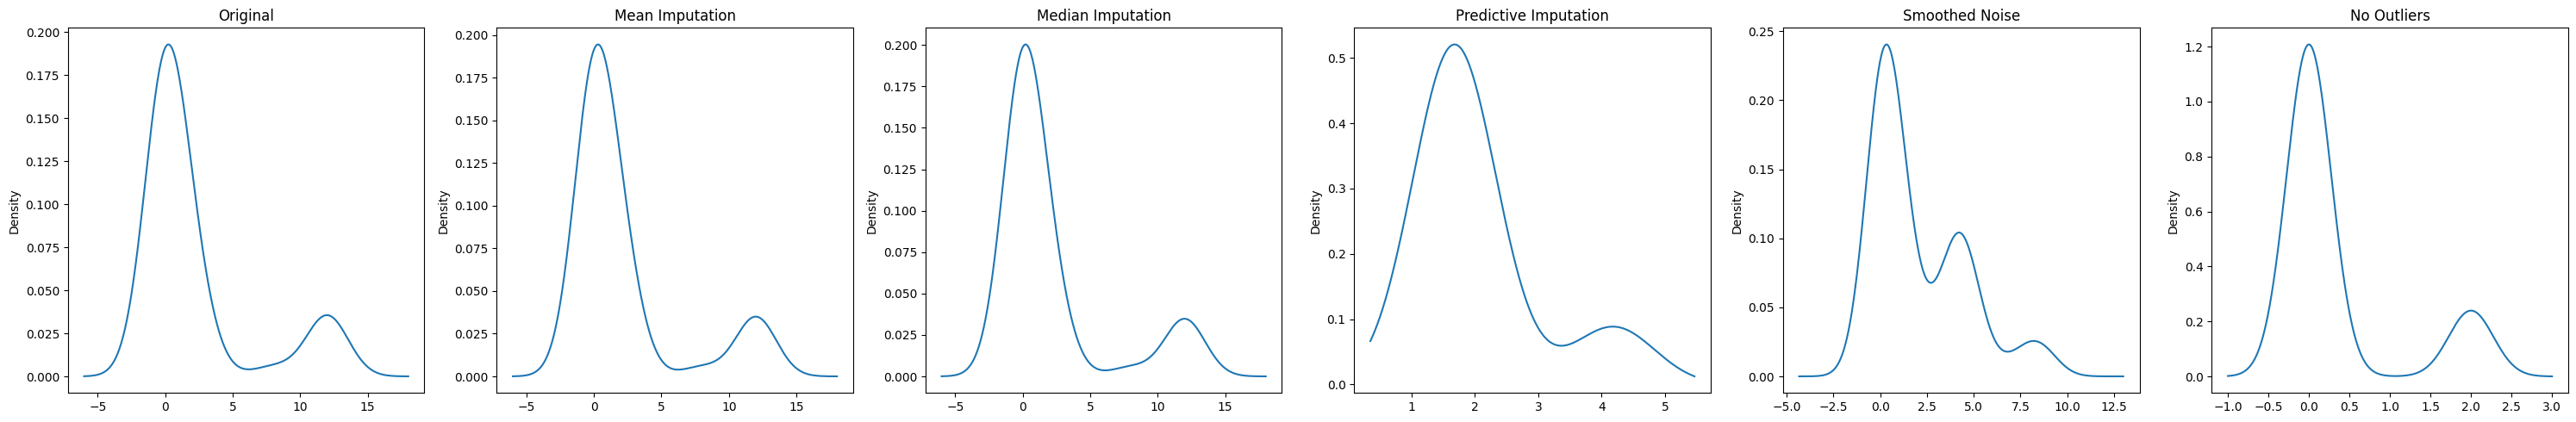

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5))


df['Weekly_Study_Hours'].plot(kind='density', ax=axes[0], title='Original')


df['Weekly_Study_Hours_mean'].plot(kind='density', ax=axes[1], title='Mean Imputation')

df['Weekly_Study_Hours_median'].plot(kind='density', ax=axes[2], title='Median Imputation')

df['Weekly_Study_Hours_predicted'].plot(kind='density', ax=axes[3], title='Predictive Imputation')

df['Weekly_Study_Hours_smoothed'].plot(kind='density', ax=axes[4], title='Smoothed Noise')

df['Weekly_Study_Hours_no_outliers'].plot(kind='density', ax=axes[5], title='No Outliers')

plt.tight_layout()
plt.show()


In [ ]:
#Data Transformation

In [18]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()
df['Weekly_Study_Hours'] = scaler.fit_transform(df[['Weekly_Study_Hours']])


In [19]:
df = pd.get_dummies(df, columns=['Sex', 'High_School_Type', 'Transportation'], drop_first=True)


In [20]:
import numpy as np

# Apply log transformation but add 1 to avoid log(0) which is undefined
df['Weekly_Study_Hours_Log'] = np.log(df['Weekly_Study_Hours'] + 1)


In [21]:
df = pd.get_dummies(df, columns=['Additional_Work', 'Sports_activity', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work'], drop_first=True)

In [ ]:
#Classification

In [22]:
df = pd.get_dummies(df, columns=['Additional_Work', 'Sports_activity', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work'], drop_first=True)


KeyError: "None of [Index(['Additional_Work', 'Sports_activity', 'Attendance', 'Reading', 'Notes',\n       'Listening_in_Class', 'Project_work'],\n      dtype='object')] are in the [columns]"

In [29]:

df_cleaned = df.drop(columns=['Scholarship'])



In [24]:


df['Weekly_Study_Hours'].fillna(df['Weekly_Study_Hours'].median(), inplace=True)


df['Weekly_Study_Hours_predicted'].fillna(df['Weekly_Study_Hours_predicted'].median(), inplace=True)


df['Weekly_Study_Hours_smoothed'].fillna(df['Weekly_Study_Hours_smoothed'].median(), inplace=True)
df['Weekly_Study_Hours_Log'].fillna(df['Weekly_Study_Hours_Log'].median(), inplace=True)


In [30]:

nan_columns = df.isna().sum()
print(nan_columns[nan_columns > 0])


Scholarship    1
dtype: int64


In [31]:
print(df_cleaned.columns)


Index(['Unnamed: 0', 'Id', 'Student_Age', 'Weekly_Study_Hours', 'Grade',
       'Weekly_Study_Hours_mean', 'Weekly_Study_Hours_median',
       'Weekly_Study_Hours_predicted', 'Weekly_Study_Hours_smoothed',
       'Weekly_Study_Hours_no_outliers', 'Sex_Male',
       'High_School_Type_Private', 'High_School_Type_State',
       'Transportation_Private', 'Weekly_Study_Hours_Log',
       'Additional_Work_Yes', 'Sports_activity_Yes', 'Attendance_Always',
       'Attendance_Never', 'Attendance_Sometimes', 'Reading_Yes', 'Notes_No',
       'Notes_Yes', 'Listening_in_Class_No', 'Listening_in_Class_Yes',
       'Project_work_Yes'],
      dtype='object')


In [32]:
from sklearn.model_selection import train_test_split


X = df_cleaned.drop('Grade', axis=1)
y = df_cleaned['Grade']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')  # Linear kernel
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [35]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)


In [ ]:
#Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Example for KNN
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))




[[2 3 2 0 0 0 0 0]
 [2 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0]
 [1 0 0 0 3 1 0 0]
 [0 0 0 0 0 2 2 0]
 [0 0 0 0 0 0 2 0]
 [1 1 1 0 0 0 0 0]]
              precision    recall  f1-score   support

          AA       0.29      0.29      0.29         7
          BA       0.20      0.25      0.22         4
          BB       0.00      0.00      0.00         2
          CB       0.00      0.00      0.00         2
          CC       0.75      0.60      0.67         5
          DC       0.67      0.50      0.57         4
          DD       0.40      1.00      0.57         2
        Fail       0.00      0.00      0.00         3

    accuracy                           0.34        29
   macro avg       0.29      0.33      0.29        29
weighted avg       0.35      0.34      0.33        29



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# SVM Evaluation
print("SVM Evaluation")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



In [ ]:
# Naive Bayes Evaluation
print("Naive Bayes Evaluation")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



In [ ]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))



In [ ]:
# Decision Tree Evaluation
print("Decision Tree Evaluation")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))